<a href="https://colab.research.google.com/github/iamdkcoder/placement-prediction/blob/master/placement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [ ]:
placement_copy = pd.read_csv("https://raw.githubusercontent.com/iamdkcoder/ml-model-ai-ds/master/Placement_Data_Full_Class.csv")


In [ ]:
placement_copy.head(10)


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [ ]:
placement_copy.shape


(215, 15)

In [ ]:
placement_copy.dtypes


sl_no               int64
gender             object
ssc_p             float64
ssc_b              object
hsc_p             float64
hsc_b              object
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
salary            float64
dtype: object

#NAN Handling


In [ ]:
placement_copy.isnull().sum()


sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

as many student has not placed therfore in salary section ther are NAN values

But , we need to replace NAN with 0. this represents students does not have salary as they are not placed

In [ ]:
placement_copy['salary'].fillna(value=0 , inplace = True )



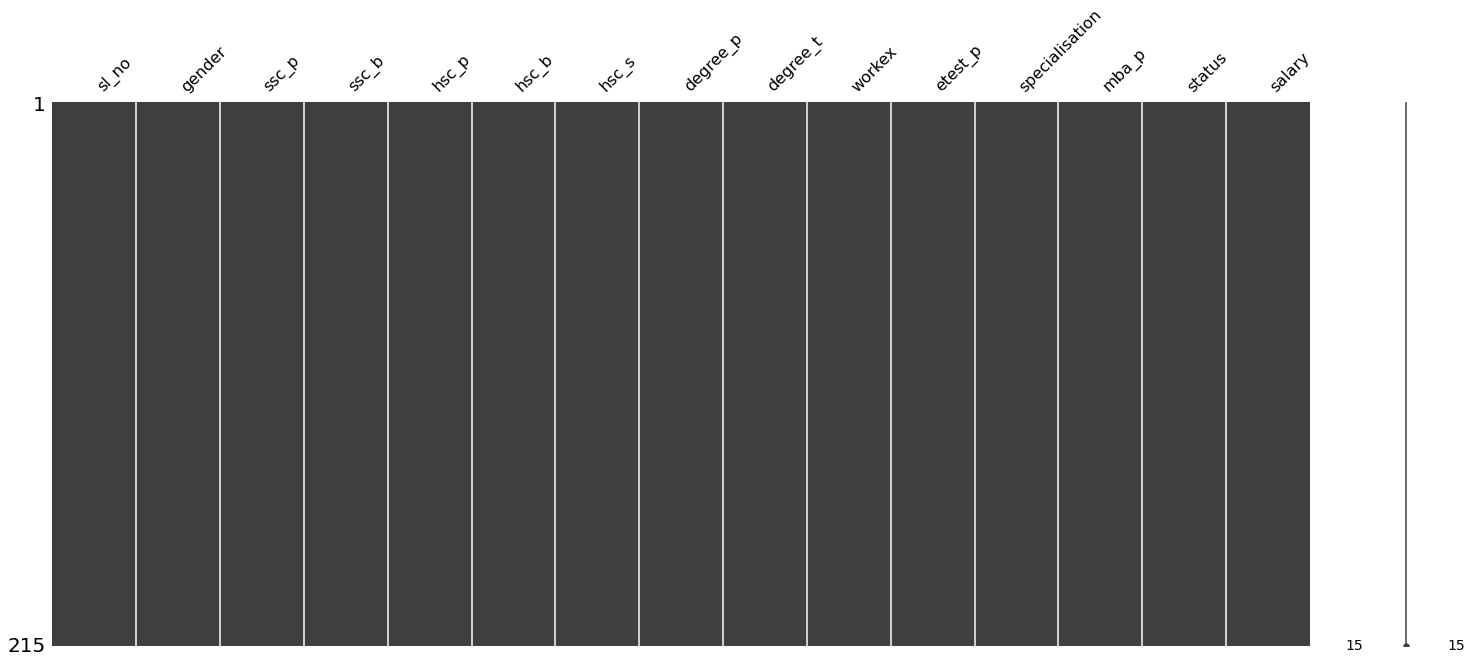

In [ ]:
import missingno as msg
msg.matrix(placement_copy)

let's check if there is any outlier in our dataset

Text(0.5, 1.0, 'Employability Percentage')

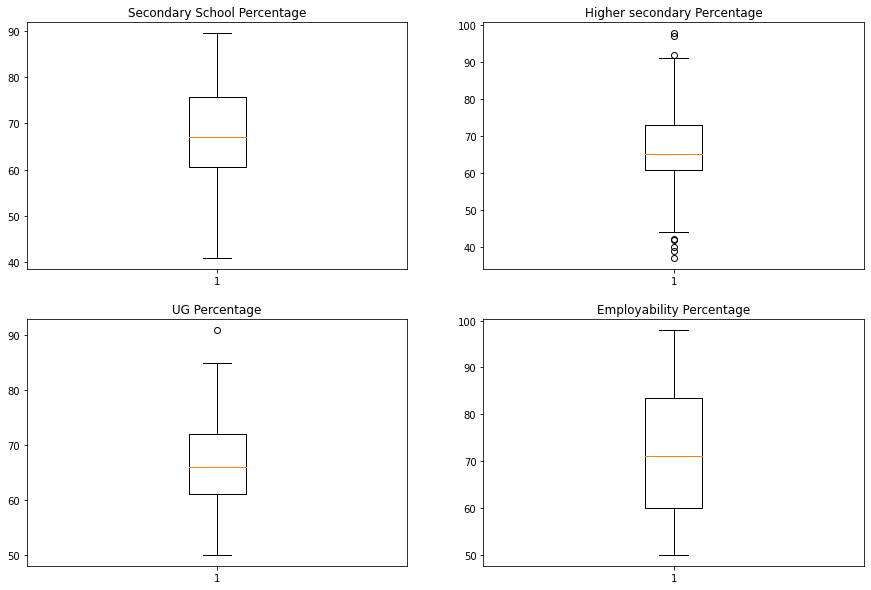

In [ ]:
plt.figure(figsize = (15,10))

ax = plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary School Percentage')

ax = plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher secondary Percentage')

ax = plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Percentage')

ax = plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability Percentage')

We can clearly see there are more outliers in HSC percentage , we have to remove those outlier 

In [ ]:
Q1 = placement_copy['hsc_p'].quantile(0.25)
Q3 = placement_copy['hsc_p'].quantile(0.75)
IQR = Q3 - Q1

filter = (placement_copy['hsc_p'] >= Q1 - 1.5 * IQR) & (placement_copy['hsc_p']<= Q3+ 1.5*IQR)
placement_filtered= placement_copy.loc[filter]

{'boxes': [<matplotlib.lines.Line2D at 0x7f61de2fda90>],
 'caps': [<matplotlib.lines.Line2D at 0x7f61de300a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f61de308b10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f61de3085d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f61de2fdfd0>,
  <matplotlib.lines.Line2D at 0x7f61de300550>]}

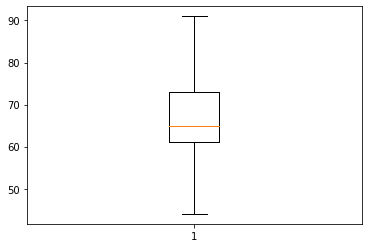

In [ ]:
plt.boxplot(placement_filtered['hsc_p'])


Data Visualization

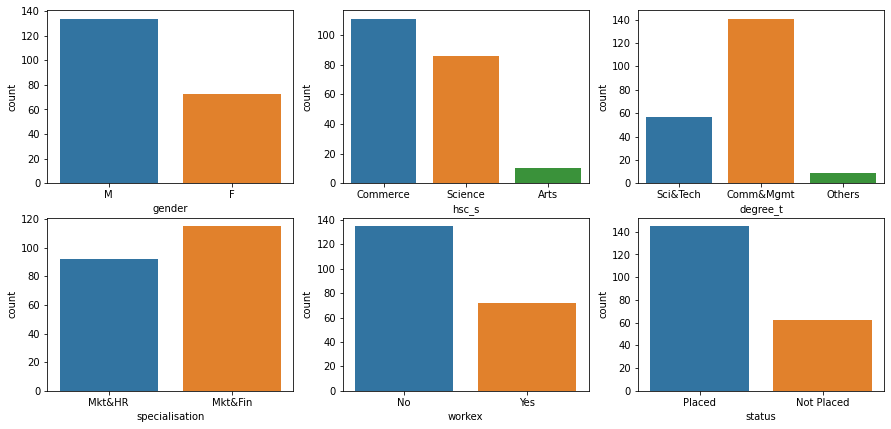

In [ ]:
plt.figure(figsize = (15,7))

plt.subplot(231)
ax = sns.countplot(x= 'gender' , data = placement_filtered)

plt.subplot(232)
ax = sns.countplot(x= 'hsc_s' , data = placement_filtered)

plt.subplot(233)
ax = sns.countplot(x= 'degree_t' , data = placement_filtered)

plt.subplot(234)
ax = sns.countplot(x= 'specialisation' , data = placement_filtered)

plt.subplot(235)
ax = sns.countplot(x= 'workex' , data = placement_filtered)

plt.subplot(236)
ax = sns.countplot(x= 'status' , data = placement_filtered)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


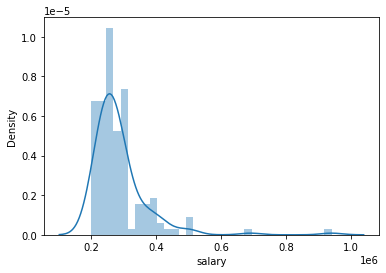

In [ ]:
placement_placed = placement_filtered[placement_filtered.salary!= 0]
sns.distplot(placement_placed['salary'])

In [ ]:
import plotly.express as px

px.violin(placement_placed,y="salary",x="specialisation",color="gender",box=True,points="all")


in our dataseet some features are not important , therefore we need to drop it

In [ ]:
placement_filtered.drop(['sl_no','ssc_b','hsc_b','salary'], axis = 1 , inplace = True)


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



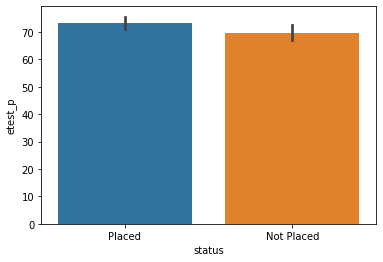

In [ ]:
sns.barplot(x='status',y='etest_p',data=placement_copy)

In [ ]:
placement_filtered.drop(['etest_p'], axis = 1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
placement_filtered.head(4)

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,Mkt&HR,59.43,Not Placed


now we have cleaned our data and extracted the important features let's Encode categorical features as a one-hot numeric array.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

In [ ]:
placement_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 0 to 214
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          207 non-null    object 
 1   ssc_p           207 non-null    float64
 2   hsc_p           207 non-null    float64
 3   hsc_s           207 non-null    object 
 4   degree_p        207 non-null    float64
 5   degree_t        207 non-null    object 
 6   workex          207 non-null    object 
 7   specialisation  207 non-null    object 
 8   mba_p           207 non-null    float64
 9   status          207 non-null    object 
dtypes: float64(4), object(6)
memory usage: 17.8+ KB


In [ ]:
X=placement_filtered.drop(columns='status')

In [ ]:
y=placement_filtered['status']

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
ohe.fit(X[['hsc_s','degree_t','workex','specialisation','gender']])

OneHotEncoder(handle_unknown='ignore')

In [ ]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['hsc_s','degree_t','workex','specialisation','gender']), remainder="passthrough")

In [ ]:
#Logistic Regression - 
scores=[]
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  logreg = LogisticRegression()
  pipe=make_pipeline(column_trans,logreg)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores.append(metrics.accuracy_score(y_test , y_pred))

In [ ]:
np.argmax(scores)

4

In [ ]:
scores1=[]
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  Dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
  pipe=make_pipeline(column_trans,Dt)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores1.append(metrics.accuracy_score(y_test , y_pred))

In [ ]:
np.argmax(scores1)

136

In [ ]:
scores2=[]


from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1000):
  x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=i)
  rt = RandomForestClassifier(n_estimators = 100)
  pipe=make_pipeline(column_trans,rt)
  pipe.fit(x_train,y_train)
  y_pred = pipe.predict(x_test)
  scores2.append(metrics.accuracy_score(y_test , y_pred))

In [ ]:
np.argmax(scores2)

784

#model performance on random state 4





In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=4)

In [ ]:

logreg = LogisticRegression()
pipe=make_pipeline(column_trans,logreg)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9761904761904762


In [ ]:

Dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
pipe=make_pipeline(column_trans,Dt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.8571428571428571


In [ ]:
rt = RandomForestClassifier(n_estimators = 100)
pipe=make_pipeline(column_trans,rt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9285714285714286


#model performance on random state 136






In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=136)

In [ ]:

logreg = LogisticRegression()
pipe=make_pipeline(column_trans,logreg)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9047619047619048


In [ ]:

Dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
pipe=make_pipeline(column_trans,Dt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9523809523809523


In [ ]:
rt = RandomForestClassifier(n_estimators = 100)
pipe=make_pipeline(column_trans,rt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9523809523809523


#model performance on random state 784


In [ ]:
x_train, x_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=784)

In [ ]:
logreg = LogisticRegression()
pipe=make_pipeline(column_trans,logreg)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.9285714285714286


In [ ]:
Dt = DecisionTreeClassifier(criterion = 'gini' , max_depth = 3)
pipe=make_pipeline(column_trans,Dt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

0.8571428571428571


In [ ]:
rt = RandomForestClassifier(n_estimators = 100)
pipe=make_pipeline(column_trans,rt)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
print(metrics.accuracy_score(y_test , y_pred))

1.0


In [ ]:
pipe.predict(pd.DataFrame([['M',90,91,'Commerce',58.00,'Sci&Tech'	,'No',	'Mkt&HR' ,	58.80	]],columns=['gender' , 'ssc_p' ,	'hsc_p'	 , 'hsc_s'	, 'degree_p'	, 'degree_t'	, 'workex'	, 'specialisation'	, 'mba_p' ]))

array(['Placed'], dtype=object)